In [2]:
import pandas as pd
donnees_techniques = pd.read_csv("D:/Formations/Data analysis Python/Data/RT_donnees_techniques_Par_Tch.csv")

In [4]:
debit = donnees_techniques["Debit_Exploitable"]

In [6]:
debit.describe()

count    296.000000
mean       5.315166
std       11.686683
min     -100.000000
25%        0.717500
50%        1.309500
75%        6.000000
max       72.000000
Name: Debit_Exploitable, dtype: float64

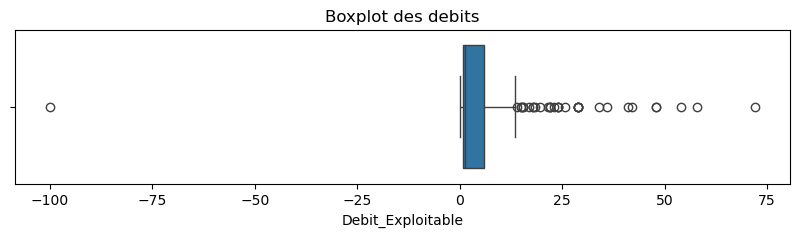

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
sns.boxplot(x=debit)
plt.title("Boxplot des debits")
plt.show()

In [10]:
#Supprimer les valeurs manquantes
debit_clean = debit.dropna()

In [12]:
#Calcul des quartiles
Q1 = debit_clean.quantile(0.25)
Q3 = debit_clean.quantile(0.75)
IQR = Q3 - Q1

#Définition des bornes
borne_min = Q1 - 1.5 * IQR
borne_max = Q3 + 1.5 * IQR

print(f"Borne min : {borne_min:.2f}, Borne max : {borne_max:.2f}")

Borne min : -7.21, Borne max : 13.92


In [14]:
#Filtrer les données valides
debit_valide = debit_clean[(debit_clean >= borne_min) & (debit_clean <= borne_max)]

# 5. Vérification
print(f"Nombre initial : {len(debit_clean)}")
print(f"Nombre après suppression des valeurs aberrantes : {len(debit_valide)}")

Nombre initial : 296
Nombre après suppression des valeurs aberrantes : 262


In [16]:
#Valeurs aberrantes
valeurs_aberrantes = debit_clean[(debit_clean < borne_min) | (debit_clean > borne_max)]

# Affichage
print(f"Nombre de valeurs aberrantes : {len(valeurs_aberrantes)}")
print(valeurs_aberrantes)

Nombre de valeurs aberrantes : 34
7       18.00
44      22.00
58      15.00
135     42.00
149     25.71
184     41.00
323     54.00
324     18.00
356     57.90
366     28.80
381     23.00
433     21.60
494     48.00
506     14.00
571     15.33
578     18.40
579     15.33
586     24.00
608     22.00
616     22.00
632     17.00
666     72.00
694     24.00
697     29.00
701     36.00
707     48.00
757   -100.00
814     19.60
841     29.00
859     24.00
922     28.80
956     28.80
957     34.00
977     15.00
Name: Debit_Exploitable, dtype: float64


In [18]:
# Suppression uniquement de la valeur -100 dans la colonne Debit_Exploitable
debit_corrige = debit_valide[~debit_valide.isin([-100.0, 0.0])]

In [20]:
debit_corrige.describe()

count    241.000000
mean       2.995929
std        3.384902
min        0.500000
25%        0.800000
50%        1.270000
75%        3.600000
max       13.470000
Name: Debit_Exploitable, dtype: float64

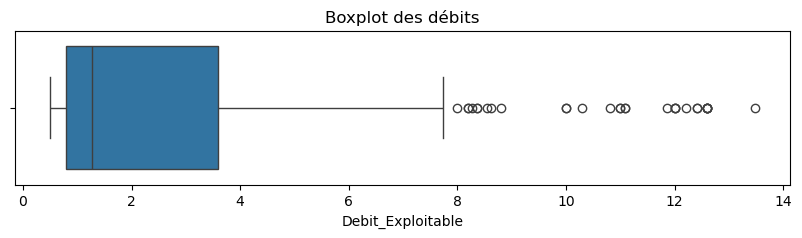

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
sns.boxplot(x=debit_corrige)
plt.title("Boxplot des débits")
plt.show()

In [24]:
# Définir les bornes CIEH et les labels
bornes_cieh = [0, 1, 2.5, 5, float('inf')]
labels = ['Très Faible', 'Faible', 'Fort', 'Très Fort']

# Créer une nouvelle colonne avec la classe de chaque débit
debit_classes = pd.cut(debit_corrige, bins=bornes_cieh, labels=labels, right=False)

# Vérifier la distribution
print(debit_classes.value_counts().sort_index())

Debit_Exploitable
Très Faible    74
Faible         85
Fort           34
Très Fort      48
Name: count, dtype: int64


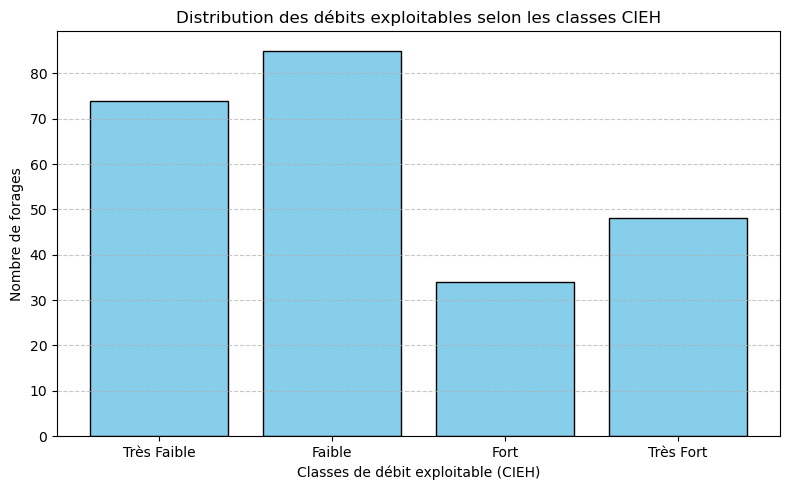

In [26]:
# Étape 2 : Créer la colonne de classes
debit_classes = pd.cut(debit_corrige, bins=bornes_cieh, labels=labels, right=False)

# Étape 3 : Compter le nombre de forages par classe
effectifs = debit_classes.value_counts().sort_index()

# Étape 4 : Créer l'histogramme
plt.figure(figsize=(8, 5))
plt.bar(effectifs.index, effectifs.values, color='skyblue', edgecolor='black')
plt.xlabel("Classes de débit exploitable (CIEH)")
plt.ylabel("Nombre de forages")
plt.title("Distribution des débits exploitables selon les classes CIEH")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [28]:
#Exportation des débits vers un csv
debit_corrige.to_csv("D:/Formations/Data analysis Python/Data/debit.csv", index=False)